In [126]:
import pandas as pd
import numpy as np
import plotly.express as px

In [127]:
df=pd.read_csv('train_ctrUa4K.csv')

# EDA

In [128]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [130]:
df.shape

(614, 13)

In [131]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [132]:
df.duplicated().sum()

0

In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [134]:
for column in df.select_dtypes(include="O").columns[1:]:
    res = df[column].unique()
    print("-" * 100)
    print(f"Unique values in column '{column}':")
    print(res)

----------------------------------------------------------------------------------------------------
Unique values in column 'Gender':
['Male' 'Female' nan]
----------------------------------------------------------------------------------------------------
Unique values in column 'Married':
['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Unique values in column 'Dependents':
['0' '1' '2' '3+' nan]
----------------------------------------------------------------------------------------------------
Unique values in column 'Education':
['Graduate' 'Not Graduate']
----------------------------------------------------------------------------------------------------
Unique values in column 'Self_Employed':
['No' 'Yes' nan]
----------------------------------------------------------------------------------------------------
Unique values in column 'Property_Area':
['Urban' 'Rural' 'Semiurban']
-------------------------------

# Data preprocessing

### Numeric

In [135]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [136]:
df['Dependents']=df['Dependents'].replace("3+","3")

In [137]:
df.Dependents.value_counts(dropna=False)
# i will drop na in this column to change it's type

Dependents
0      345
1      102
2      101
3       51
NaN     15
Name: count, dtype: int64

In [138]:
df.dropna(subset=("Dependents"),axis=0,inplace=True,ignore_index=True)
df.reset_index(inplace=True,drop=True)

In [139]:
df['Dependents']=df['Dependents'].astype("int64",errors="ignore")

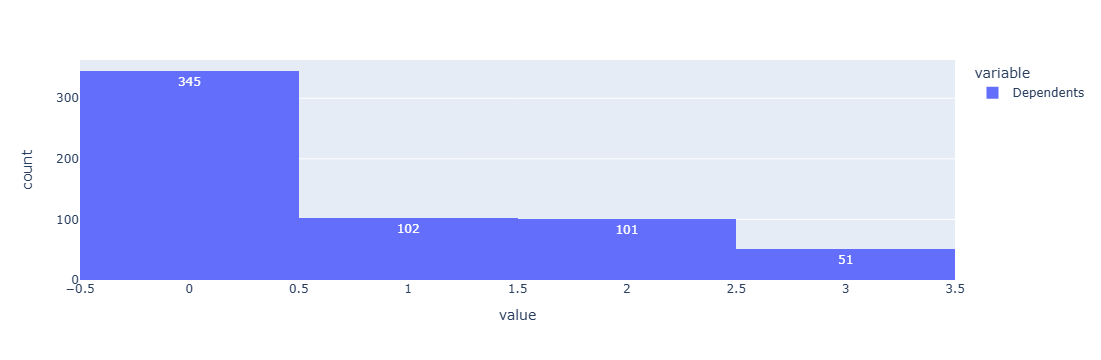

In [140]:
px.histogram(df.Dependents,text_auto=True)

In [141]:
df.ApplicantIncome.value_counts()

ApplicantIncome
2500    9
2600    6
4583    6
6000    6
3750    5
       ..
4408    1
3917    1
3992    1
4923    1
7583    1
Name: count, Length: 492, dtype: int64

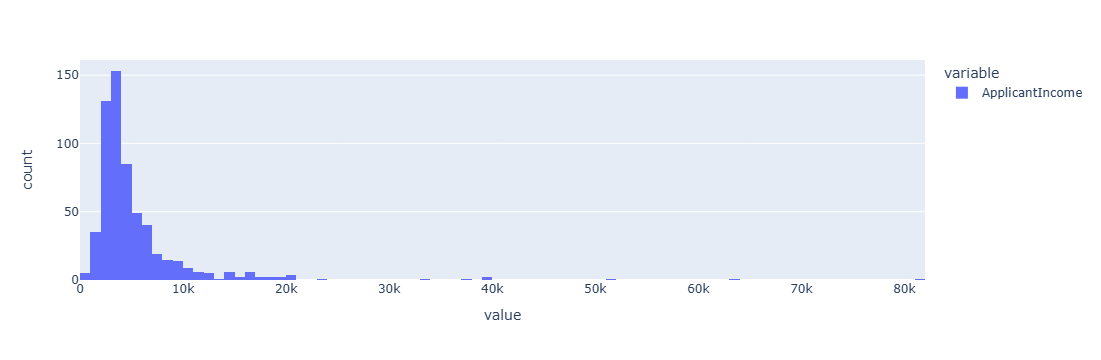

In [142]:
px.histogram(df.ApplicantIncome)

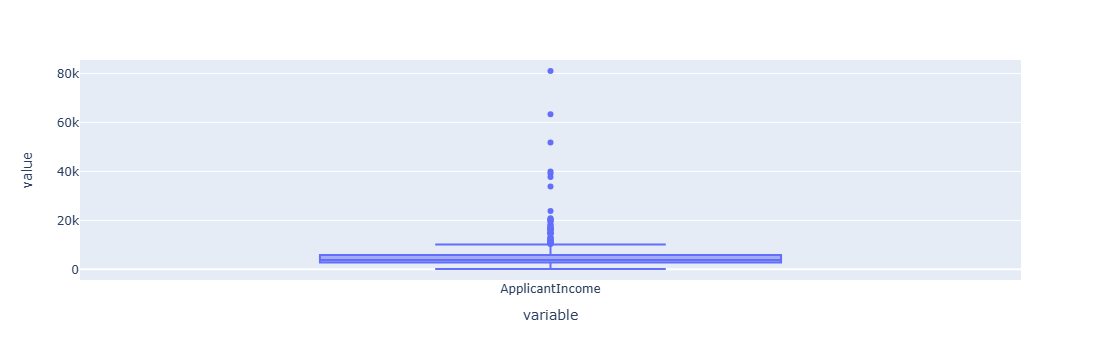

In [143]:
px.box(df.ApplicantIncome)

In [144]:
# will calculate the outlier of ApplicantIncome column
q1 = np.percentile(df.ApplicantIncome, 25)
q3 = np.percentile(df.ApplicantIncome, 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]
outlier_indices_A = outliers.index.tolist()

print("Outlier Indices:", outlier_indices_A)


Outlier Indices: [9, 34, 54, 67, 104, 113, 117, 123, 125, 127, 135, 141, 143, 152, 168, 180, 182, 188, 196, 249, 253, 266, 273, 279, 301, 317, 325, 358, 359, 398, 413, 421, 426, 431, 455, 463, 466, 471, 475, 481, 494, 497, 512, 520, 521, 548, 558, 580, 589]


In [145]:
# will drop the outlier of ApplicantIncome column 
df.drop(outlier_indices_A,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

In [146]:
df.CoapplicantIncome.value_counts()

CoapplicantIncome
0.0       226
1666.0      5
2083.0      5
2500.0      5
2333.0      3
         ... 
2383.0      1
2791.0      1
1010.0      1
1695.0      1
240.0       1
Name: count, Length: 277, dtype: int64

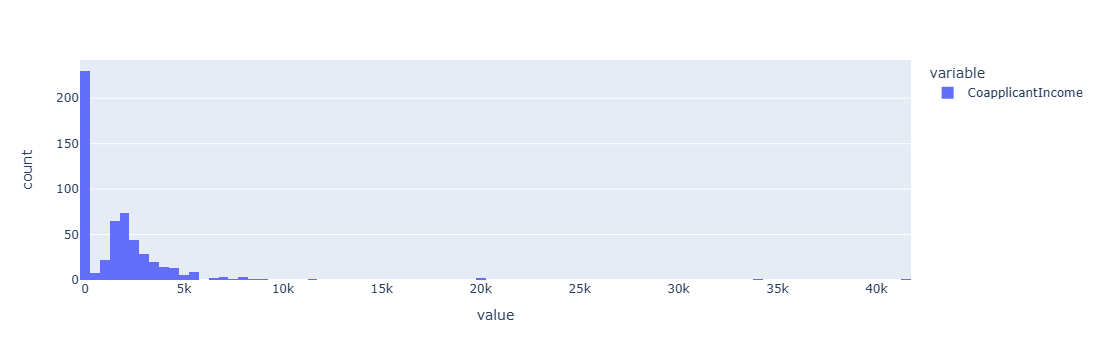

In [147]:
px.histogram(df.CoapplicantIncome)

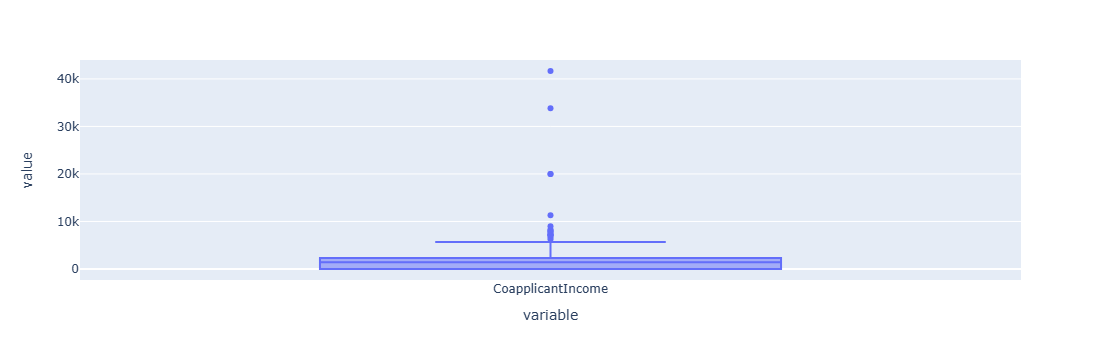

In [148]:
px.box(df.CoapplicantIncome)

In [149]:
# will calculate the outlier of CoapplicantIncome column
q1 = np.percentile(df.CoapplicantIncome, 25)
q3 = np.percentile(df.CoapplicantIncome, 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)]
outlier_indices_C = outliers.index.tolist()

print("Outlier Indices:", outlier_indices_C)


Outlier Indices: [11, 36, 112, 122, 159, 162, 229, 312, 332, 362, 376, 398, 459, 468, 520, 537]


In [150]:
# will drop the outlier of CoapplicantIncome column 
df.drop(outlier_indices_C,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

In [151]:
# will create new column called total income that is the sum of applicant and Coapplicant
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [152]:
# will create new column called Income-to-Loan Ratio that is total income divided by loan amount can be an indicator of an applicant's ability to repay the loan.
df['Income_to_Loan_Ratio']=(df['Total_income']/df['LoanAmount'])/100

In [153]:
df['Income_to_Loan_Ratio'].describe()

count    515.000000
mean       0.455647
std        0.215804
min        0.120902
25%        0.351390
50%        0.405508
75%        0.493255
max        2.642222
Name: Income_to_Loan_Ratio, dtype: float64

In [154]:
# will drop values more than 1 because it is outlier 
income_ratio=df[df['Income_to_Loan_Ratio']>1].index
df.drop(income_ratio,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

In [155]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    441
180.0     32
480.0     12
300.0     10
84.0       4
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [156]:
# will create column to calculate te loan amount term in years
df['loan_term_in_years']=df['Loan_Amount_Term']/12

In [157]:
df.LoanAmount.value_counts(dropna=False)

LoanAmount
NaN      19
120.0    19
110.0    16
100.0    15
113.0    11
         ..
207.0     1
330.0     1
280.0     1
42.0      1
253.0     1
Name: count, Length: 167, dtype: int64

In [158]:
cleaned_column = df['LoanAmount'].dropna()
q1 = np.percentile(cleaned_column, 25)
q3 = np.percentile(cleaned_column, 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_L = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)].index


print("Outliers:", len(outliers))

Outliers: 16


In [159]:
# will drop outlier of column LoanAmount 
df.drop(outliers_L,axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

In [160]:
df.Credit_History.value_counts(dropna=False)
# it will imputed later 

Credit_History
1.0    385
0.0     72
NaN     40
Name: count, dtype: int64

### catrgorical

In [161]:
df.select_dtypes("O").describe()
# the non value will impute later 

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,497,488,497,497,469,497,497
unique,497,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,394,321,373,412,189,345


In [162]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0}).astype(int)


C:\Users\adham\AppData\Local\Temp\ipykernel_39748\460582154.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# visulization

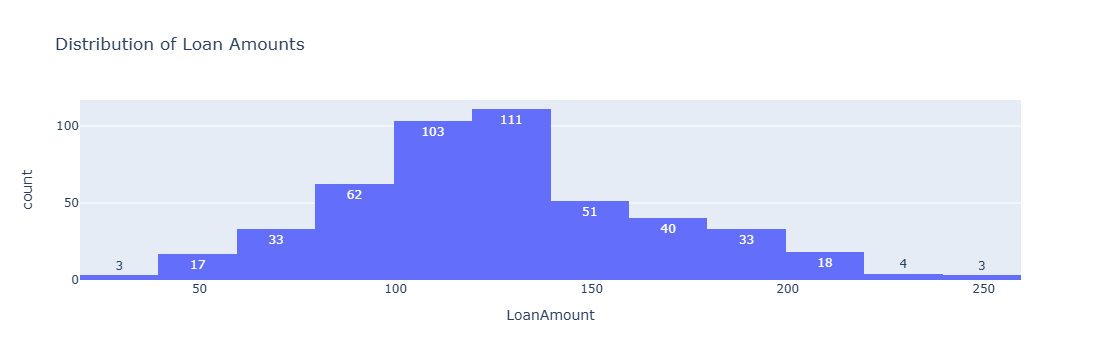

In [163]:
# Distribution of Loan Amounts
px.histogram(df, x="LoanAmount", nbins=20, title="Distribution of Loan Amounts",text_auto=True)



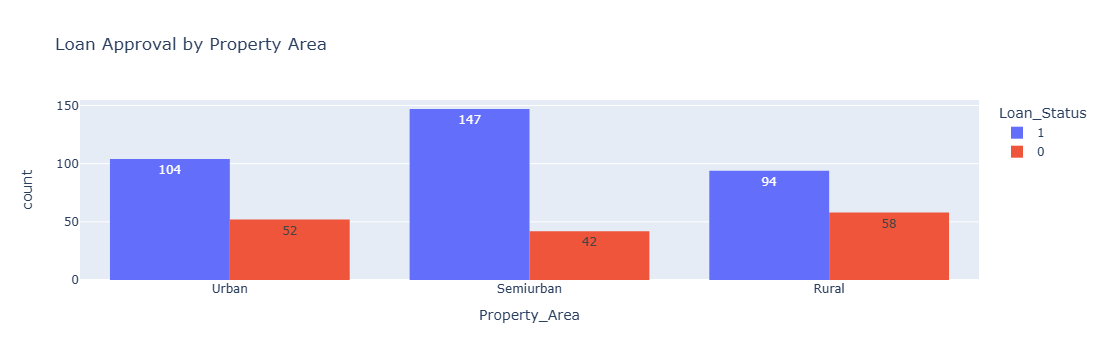

In [164]:
# How do Property Areas impact Loan Approval?
px.histogram(df, x="Property_Area", color="Loan_Status", barmode="group", title="Loan Approval by Property Area",text_auto=True)


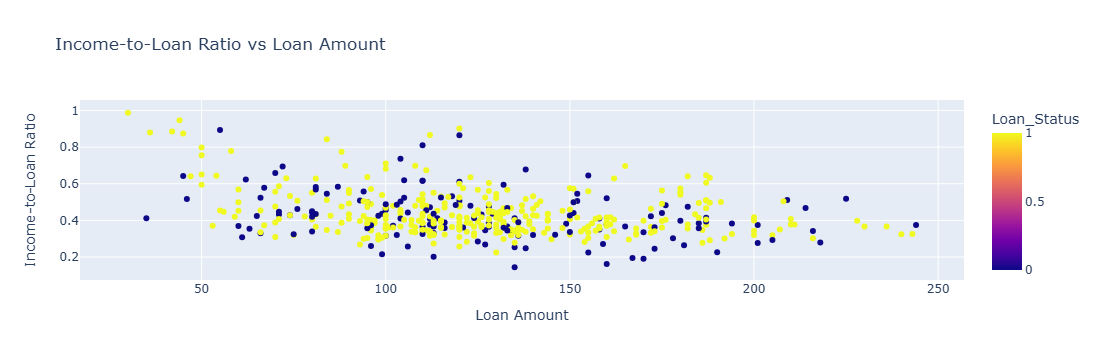

In [165]:
# What is the relationship between Loan Amount and Income-to-Loan Ratio?
fig = px.scatter(df, x="LoanAmount", y="Income_to_Loan_Ratio", color="Loan_Status",
                 title="Income-to-Loan Ratio vs Loan Amount",
                 labels={"LoanAmount": "Loan Amount", "Income_to_Loan_Ratio": "Income-to-Loan Ratio"})
fig.update_layout(xaxis_title="Loan Amount", yaxis_title="Income-to-Loan Ratio")
fig.show()

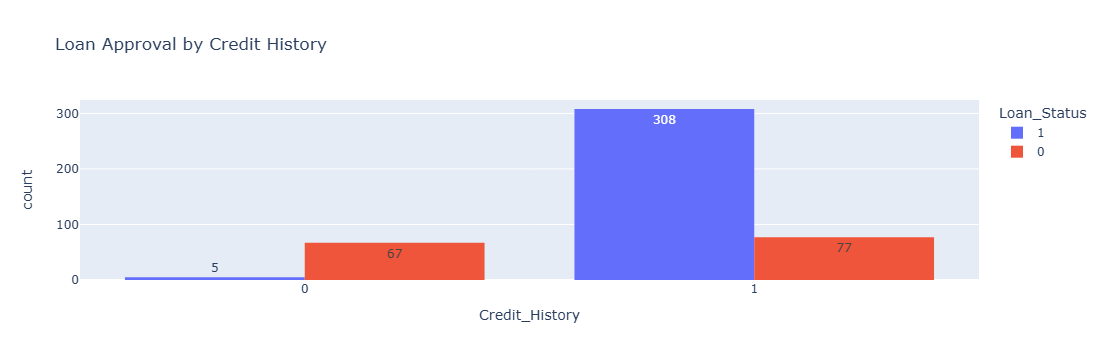

In [166]:
# Is there a correlation between Credit History and Loan Approval?
px.histogram(df, x="Credit_History", color="Loan_Status", barmode="group", title="Loan Approval by Credit History",text_auto=True)


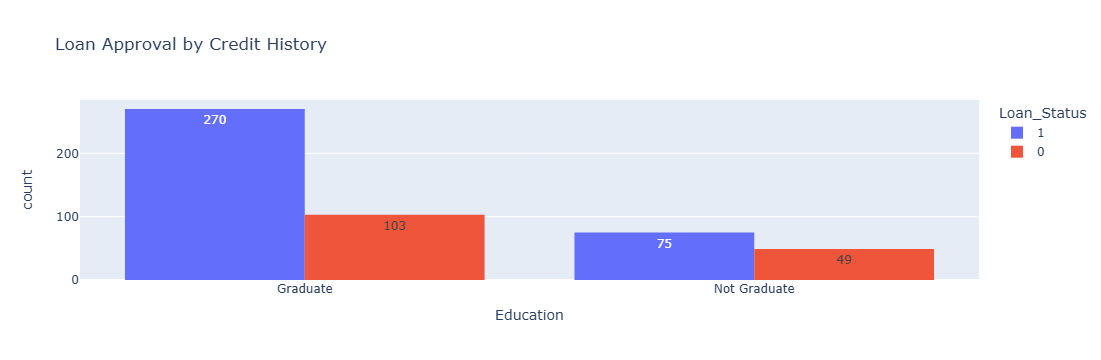

In [167]:
# Is there a correlation between Education and Loan Approval?
px.histogram(df, x="Education", color="Loan_Status", barmode="group", title="Loan Approval by Credit History",text_auto=True)


In [168]:
# will drop column Loan_ID , Loan_Amount_Term 
df.drop(columns=['Loan_ID','Loan_Amount_Term'],axis=1,inplace=True)

In [169]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_income,Income_to_Loan_Ratio,loan_term_in_years
0,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,1,5849.0,NaN,30.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,0,6091.0,0.475859,30.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,1,3000.0,0.454545,30.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,1,4941.0,0.411750,30.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,1,6000.0,0.425532,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,1.0,Rural,1,5398.0,0.343822,30.0
493,Male,Yes,0,Graduate,No,3232,1950.0,108.0,1.0,Rural,1,5182.0,0.479815,30.0
494,Female,No,0,Graduate,No,2900,0.0,71.0,1.0,Rural,1,2900.0,0.408451,30.0
495,Male,Yes,2,Graduate,No,7583,0.0,187.0,1.0,Urban,1,7583.0,0.405508,30.0


# modeling

In [235]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib

In [171]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [218]:
models = []
models.append(("DT" , DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("rf" , RandomForestClassifier()))
models.append(("xgb" , XGBClassifier()))
models.append(("LR" , LogisticRegression()))


In [219]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])



In [220]:
for name, model in models:
    steps = [
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('smote', SMOTE()),
        ('classifier', model)
    ]
    pipeline = ImbPipeline(steps=steps)
    res = cross_validate(pipeline, x, y, cv=5, scoring='accuracy', return_train_score=True)
    print(f"Model {name} train acc is {res['train_score'].mean():.4f}")
    print(f"Model {name} test acc is {res['test_score'].mean():.4f}")
    print("-" * 100)

Model DT train acc is 1.0000
Model DT test acc is 0.7484
----------------------------------------------------------------------------------------------------
Model KNN train acc is 0.8260
Model KNN test acc is 0.6801
----------------------------------------------------------------------------------------------------
Model rf train acc is 1.0000
Model rf test acc is 0.7969
----------------------------------------------------------------------------------------------------
Model xgb train acc is 1.0000
Model xgb test acc is 0.7908
----------------------------------------------------------------------------------------------------
Model LR train acc is 0.7832
Model LR test acc is 0.7686
----------------------------------------------------------------------------------------------------


In [221]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Credit_History',
                                                   'Total_income',
                                                   'Income_to_Loan_Ratio',
                                                   'loan_term_in_years']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('scaler', StandardScaler()), ('smote', SMOTE()),
                ('classifier', LogisticRegression())])

In [227]:
pipeline.fit(x,y)
joblib.dump(pipeline,'model.pkl')

['model.pkl']

In [228]:
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [236]:
%%writefile Loan.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from imblearn.pipeline import Pipeline as ImbPipeline


# Load the model and input columns
Model = joblib.load("model.pkl")
Inputs = joblib.load("Inputs.pkl")

# Define the prediction function
def Predicitons(Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, 
                CoapplicantIncome, LoanAmount, Credit_History, Property_Area, 
                loan_term_in_years):
    # Calculate Total_income and Income_to_Loan_Ratio
    Total_income = ApplicantIncome + CoapplicantIncome
    Income_to_Loan_Ratio = Total_income / LoanAmount if LoanAmount != 0 else 0

    # Prepare the input DataFrame
    pr_df = pd.DataFrame(columns=Inputs)
    pr_df.at[0, 'Gender'] = Gender
    pr_df.at[0, 'Married'] = Married
    pr_df.at[0, 'Dependents'] = Dependents
    pr_df.at[0, 'Education'] = Education
    pr_df.at[0, 'Self_Employed'] = Self_Employed
    pr_df.at[0, 'ApplicantIncome'] = ApplicantIncome
    pr_df.at[0, 'CoapplicantIncome'] = CoapplicantIncome
    pr_df.at[0, 'LoanAmount'] = LoanAmount
    pr_df.at[0, 'Credit_History'] = Credit_History
    pr_df.at[0, 'Property_Area'] = Property_Area
    pr_df.at[0, 'loan_term_in_years'] = loan_term_in_years
    pr_df.at[0, 'Total_income'] = Total_income
    pr_df.at[0, 'Income_to_Loan_Ratio'] = Income_to_Loan_Ratio
    
    # Predict loan status
    prediction = Model.predict(pr_df)
    return prediction[0]

# Streamlit main function
def main():
    st.title("Loan Prediction")

    # User inputs
    Gender = st.selectbox("Gender", ['Male', 'Female'])
    Married = st.selectbox("Married", ['Yes', 'No'])
    Dependents = st.slider("Dependents", min_value=0, max_value=3, value=2, step=1)
    Education = st.selectbox("Education", ['Not Graduate', 'Graduate'])
    Self_Employed = st.selectbox("Self Employed", ['Yes', 'No'])
    ApplicantIncome = st.slider("Applicant Income", min_value=150, max_value=10000, value=2000, step=500)
    CoapplicantIncome = st.slider("Coapplicant Income", min_value=0, max_value=5701, value=1500, step=500)
    LoanAmount = st.slider("Loan Amount", min_value=30, max_value=244, value=100, step=10)
    Credit_History = st.selectbox("Credit History", [0, 1])
    Property_Area = st.selectbox("Property Area", ['Urban', 'Rural', 'Semiurban'])
    loan_term_in_years = st.slider("Loan Term in Years", min_value=1, max_value=30, value=5, step=1)

    # Calculate and display derived fields
    Total_income = ApplicantIncome + CoapplicantIncome
    Income_to_Loan_Ratio = Total_income / LoanAmount if LoanAmount != 0 else 0
    st.write(f"Total Income: {Total_income}")
    st.write(f"Income to Loan Ratio: {Income_to_Loan_Ratio:.2f}")

    # Prediction
    if st.button("Predict Loan Status"):
        result = Predicitons(Gender, Married, Dependents, Education, Self_Employed, 
                             ApplicantIncome, CoapplicantIncome, LoanAmount, 
                             Credit_History, Property_Area, loan_term_in_years)
        st.success(f"Predicted Loan Status: {result}")

if __name__ == "__main__":
    main()


Overwriting Loan.py


In [212]:
df.Loan_Status.value_counts()

Loan_Status
1    345
0    152
Name: count, dtype: int64